In [1]:
import pandas as pd
import seaborn as sns

analysisResults = pd.read_csv("saf_demostats.csv",sep="\t",header=None)
analysisResults.set_axis(["pct", "stops", "Total_Pop", "arrestRatio", "friskRatio", "contraRatio",
    "black_prcntstop", "black", "white_prcntstop", "white", 
    "hispanic_prcntstop", "hispanic", "asian_prcntstop", "asian"], axis=1, inplace=True)

analysisResults

,pct,stops,Total_Pop,arrestRatio,friskRatio,contraRatio,black_prcntstop,black,white_prcntstop,white,hispanic_prcntstop,hispanic,asian_prcntstop,asian
0,1,2585,66679,0.09,0.51,0.02,63.21,2.97,11.99,70.83,15.90,7.01,3.21,15.78
1,10,2760,50180,0.10,0.49,0.04,46.49,7.01,20.07,61.38,23.19,17.58,2.83,11.17
2,100,3020,47913,0.10,0.61,0.02,66.09,24.23,17.09,55.92,12.38,14.95,1.09,2.75
3,101,9159,67065,0.09,0.64,0.02,89.73,49.29,0.95,20.38,5.93,25.26,0.36,1.84
4,102,6694,144215,0.14,0.61,0.02,18.52,8.34,9.01,19.87,39.87,40.76,20.73,21.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,84,4010,48196,0.07,0.45,0.01,67.41,12.31,10.50,62.38,14.91,12.61,2.12,9.24
72,88,7156,51421,0.05,0.48,0.02,78.00,42.76,5.06,30.93,11.57,15.74,1.70,6.50
73,9,5196,76443,0.11,0.46,0.04,33.20,7.15,19.48,51.75,32.64,23.93,2.73,14.17
74,90,10398,116836,0.05,0.48,0.02,34.63,6.24,8.57,55.18,42.72,32.46,0.89,4.67


### How much of the burden is being carried by different racial groups?

Are certain groups stopped at a higher rate (accounting for the fraction of the population they account for)? We can answer this question with the data we have.

In [2]:
df_melted = pd.melt(analysisResults, id_vars=["pct", "stops", "arrestRatio", "friskRatio", "contraRatio"])
df_melted[['group','stopOrPop']] = df_melted.variable.str.split("_",expand=True)

df_melted = df_melted[["pct", "stops", "arrestRatio", "friskRatio", "contraRatio", "value", "group", "stopOrPop"]]
df_stops = df_melted[df_melted['stopOrPop'] == "prcntstop"]
df_pop = df_melted[df_melted['stopOrPop'] != "prcntstop"]

merged = df_stops.merge(df_pop, on=["pct", "stops", "arrestRatio", "friskRatio", "contraRatio", "group"])
print(merged)


     pct  stops  arrestRatio  friskRatio  contraRatio  value_x  group  \
0      1   2585         0.09        0.51         0.02    63.21  black   
1     10   2760         0.10        0.49         0.04    46.49  black   
2    100   3020         0.10        0.61         0.02    66.09  black   
3    101   9159         0.09        0.64         0.02    89.73  black   
4    102   6694         0.14        0.61         0.02    18.52  black   
..   ...    ...          ...         ...          ...      ...    ...   
299   84   4010         0.07        0.45         0.01     2.12  asian   
300   88   7156         0.05        0.48         0.02     1.70  asian   
301    9   5196         0.11        0.46         0.04     2.73  asian   
302   90  10398         0.05        0.48         0.02     0.89  asian   
303   94   1546         0.09        0.67         0.03     1.36  asian   

    stopOrPop_x  value_y stopOrPop_y  
0     prcntstop     2.97        None  
1     prcntstop     7.01        None  
2     

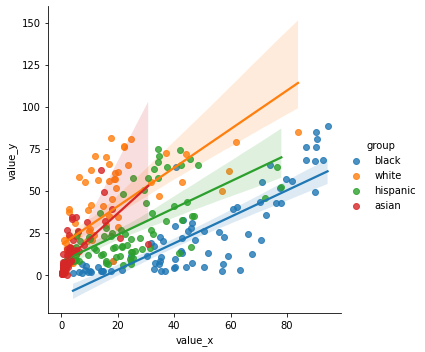

In [3]:
sns.lmplot(x='value_x',y='value_y',hue="group",data=merged)

The 45degree line gives us the equal treatment line. The populations that fall below that line are stopped more than their share of the population and those above it are stopped less.

### The relationship between frequency of stops of sucess

Let's look at a different relationship. How successful are the police in detecting crime as a function of how aggresive they are with the stops? Here, we will use arrestRatio as a heuristic. You can also use contraRatio.

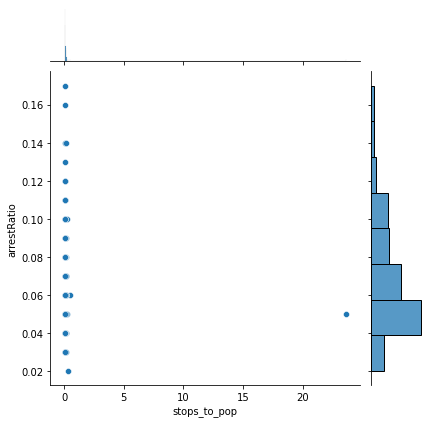

In [4]:
analysisResults["stops_to_pop"] = analysisResults["stops"] / analysisResults["Total_Pop"]
sns.jointplot(x='stops_to_pop',y='arrestRatio',data=analysisResults)

This plot is really hard to see due to the single outlier. Two things: First, what is going on with that precinct? And second, how can we create a more interpretable plot? We will cover this in later lectures in detail but we can either (i) use log scale in the plot so we can see the datapoints with smaller x values or (ii) remove the outlier. Lets first see which precinct is stopping its population over 20 times over a year. Next we will regenerate our plots with better interpretability

In [5]:
analysisResults[analysisResults["stops_to_pop"]>20]

,pct,stops,Total_Pop,arrestRatio,friskRatio,contraRatio,black_prcntstop,black,white_prcntstop,white,hispanic_prcntstop,hispanic,asian_prcntstop,asian,stops_to_pop
27,22,591,25,0.05,0.4,0.02,40.78,64.0,18.27,8.0,22.67,24.0,2.03,0.0,23.64


We can see that precinct 22 (a quick Google query reveals that this is the Central Park precinct) has only a population of 25. This is somewhat of an odd precinct. We can safely remove it.

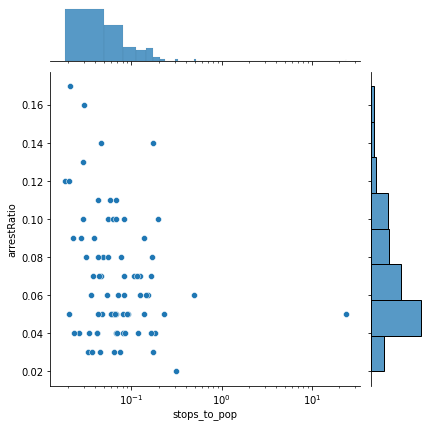

In [6]:
g = sns.jointplot(x='stops_to_pop',y='arrestRatio',data=analysisResults)
g.ax_joint.set_xscale('log')

<AxesSubplot:xlabel='stops_to_pop', ylabel='arrestRatio'>

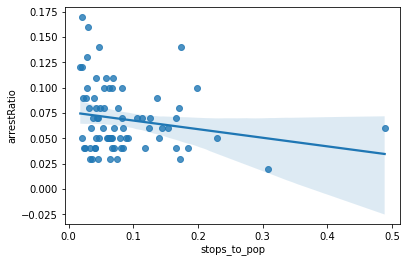

In [7]:
sns.regplot(x='stops_to_pop',y='arrestRatio',data=analysisResults[analysisResults["stops_to_pop"] < 10])

Police are, on average, worse at finding the successful cases where they are stopping a larger fraction of the population. This might suggest that as the police lower their threshold for stopping, they are introducing a heavier burden on the population while being less effective. 